In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

#imports

In [3]:
dataRestaurants = pd.read_csv("https://data.wprdc.org/datastore/dump/112a3821-334d-4f3f-ab40-4de1220b1a0a")
dataRestaurants.head(5)

#loading in file 

,id,facility_name,num,street,city,state,zip,municipal,category_cd,description,...,bus_st_date,bus_cl_date,seat_count,noroom,sq_feet,status,placard_st,x,y,address
0,10762,North Versailles VFD / South Wilmerding Social...,830,Sylvan Ave,North Versailles,PA,15137.0,North Versailles,250,Social Club-Bar Only,...,1969-01-01,NaN,60.0,NaN,NaN,1,1.0,-79.795408,40.389352,830 Sylvan Ave PA 15137
1,10781,Hill Top Lodge #151,128-30,Ormsby Ave,Pittsburgh,PA,15210.0,Mt Oliver,250,Social Club-Bar Only,...,1984-06-17,NaN,35.0,NaN,NaN,7,NaN,-79.863828,40.428111,128-30 Ormsby Ave PA 15210
2,10693,The Suburban Room,3113,W Liberty Ave,Pittsburgh,PA,15216.0,Dormont,201,Restaurant with Liquor,...,1984-06-17,NaN,41.0,NaN,NaN,7,1.0,-80.039348,40.390970,3113 W Liberty Ave PA 15216
3,10707,Hyd A Way Bar,NaN,Box 39,Morgan,PA,15064.0,South Fayette,201,Restaurant with Liquor,...,1987-03-01,NaN,30.0,NaN,NaN,7,NaN,NaN,NaN,Box 39 PA 15064
4,10711,Bratstvo Lodge #6 SNPJ,540,3rd Avenue,Bridgeville,PA,15017.0,Bridgeville,201,Restaurant with Liquor,...,1984-06-17,NaN,75.0,NaN,NaN,1,1.0,-80.135185,40.355935,540 3rd Avenue PA 15017


In [24]:
dataRestaurants['municipal'] = dataRestaurants['municipal'].replace(['Pittsburgh-100', 'Pittsburgh-101', 'Pittsburgh-102', 'Pittsburgh-103', 'Pittsburgh-104', 'Pittsburgh-105', 'Pittsburgh-106'], ['Sewickley', 'Sewickley Hts.', 'Sewickley Hills', 'Shaler', 'Sharpsburg', 'South Fayette', 'South Park'])
dataRestaurants['municipal'] = dataRestaurants['municipal'].replace(['Pittsburgh-107', 'Pittsburgh-108', 'Pittsburgh-109', 'Pittsburgh-110', 'Pittsburgh-111', 'Pittsburgh-112'], ['South Versailles', 'Springdale Borough', 'Springdale Township', 'Stowe', 'Swissvale', 'Tarentum'])
dataRestaurants['municipal'] = dataRestaurants['municipal'].replace(['Pittsburgh-113', 'Pittsburgh-114', 'Pittsburgh-115', 'Pittsburgh-116', 'Pittsburgh-117', 'Pittsburgh-118'], ['Thornburg', 'Trafford', 'Turtle Creek', 'Upper St. Clair', 'Verona', 'Versailles'])
dataRestaurants['municipal'] = dataRestaurants['municipal'].replace(['Pittsburgh-119', 'Pittsburgh-120', 'Pittsburgh-121', 'Pittsburgh-122', 'Pittsburgh-123', 'Pittsburgh-124'], ['Wall', 'West Deer', 'West Elizabeth', 'West Homestead', 'West Mifflin', 'West View'])
dataRestaurants['municipal'] = dataRestaurants['municipal'].replace(['Pittsburgh-125', 'Pittsburgh-126', 'Pittsburgh-127', 'Pittsburgh-128', 'Pittsburgh-129', 'Pittsburgh-130'], ['Whitaker', 'White Oak', 'Whitehall', 'Wilkins', 'Wilkinsburg', 'Wilmerding'])

#manually changing municipal numbers to their respective names

In [17]:
pitt_only = dataRestaurants.loc[dataRestaurants['city']== 'Pittsburgh']
pitt_only.head(5)

#since the data lists all restaurants in the Alleghany County, I had to grab only the ones in Pittsburgh

,id,facility_name,num,street,city,state,zip,municipal,category_cd,description,...,bus_st_date,bus_cl_date,seat_count,noroom,sq_feet,status,placard_st,x,y,address
1,10781,Hill Top Lodge #151,128-30,Ormsby Ave,Pittsburgh,PA,15210.0,Mt Oliver,250,Social Club-Bar Only,...,1984-06-17,NaN,35.0,NaN,NaN,7,NaN,-79.863828,40.428111,128-30 Ormsby Ave PA 15210
2,10693,The Suburban Room,3113,W Liberty Ave,Pittsburgh,PA,15216.0,Dormont,201,Restaurant with Liquor,...,1984-06-17,NaN,41.0,NaN,NaN,7,1.0,-80.039348,40.390970,3113 W Liberty Ave PA 15216
6,10734,Holiday Park Volunteer Fire Dept,415,Abers Creek Road,Pittsburgh,PA,15239.0,Plum,408,Firehall with Liquor,...,1957-01-01,NaN,125.0,NaN,NaN,1,1.0,-79.705888,40.467302,415 Abers Creek Road PA 15239
11,10605,McArdle Tavern,1600,Bingham Street,Pittsburgh,PA,15203.0,Verona,201,Restaurant with Liquor,...,1984-06-17,NaN,30.0,NaN,NaN,1,1.0,-79.982503,40.429411,1600 Bingham Street PA 15203
12,10606,Arlington Vets Association,1751,Arlington Ave,Pittsburgh,PA,15210.0,Verona,250,Social Club-Bar Only,...,1984-06-17,2017-07-13,30.0,NaN,NaN,7,1.0,-79.984543,40.417903,1751 Arlington Ave PA 15210


In [18]:
status = pitt_only.loc[dataRestaurants['status']== 1]
status.head(5)

#grabbing only the restaurants that are still active (1 = active, 7 = inactive)

,id,facility_name,num,street,city,state,zip,municipal,category_cd,description,...,bus_st_date,bus_cl_date,seat_count,noroom,sq_feet,status,placard_st,x,y,address
6,10734,Holiday Park Volunteer Fire Dept,415,Abers Creek Road,Pittsburgh,PA,15239.0,Plum,408,Firehall with Liquor,...,1957-01-01,NaN,125.0,NaN,NaN,1,1.0,-79.705888,40.467302,415 Abers Creek Road PA 15239
11,10605,McArdle Tavern,1600,Bingham Street,Pittsburgh,PA,15203.0,Verona,201,Restaurant with Liquor,...,1984-06-17,NaN,30.0,NaN,NaN,1,1.0,-79.982503,40.429411,1600 Bingham Street PA 15203
13,10636,Pittsburgh Golf Club Restaurant,5280,Northumberland Street,Pittsburgh,PA,15217.0,Trafford,201,Restaurant with Liquor,...,1986-01-01,NaN,220.0,NaN,NaN,1,1.0,-79.939449,40.440229,5280 Northumberland Street PA 15217
23,37160,Calvary United Methodist Church,971,Beech Avenue,Pittsburgh,PA,15233.0,West Homestead,407,Church Kitchen,...,1984-06-17,NaN,NaN,NaN,100.0,1,1.0,-80.018690,40.452211,971 Beech Avenue PA 15233
32,199904220005,Yeshiva Nechama Minsky Girls School & Preschool,6401,Forbes Avenue,Pittsburgh,PA,15217.0,Trafford,651,School Full Service Kitchen,...,1999-04-12,NaN,NaN,NaN,0.0,1,1.0,-79.917289,40.438414,6401 Forbes Avenue PA 15217


In [19]:
active = status.groupby("municipal").size()
active.head(10)

#grouping the neighborhoods together to see how many restaurants are in each

municipal
All Municipalities    30
Aspinwall             23
Avalon                28
Baldwin Boro          61
Baldwin Twp           11
Bellevue              64
Ben Avon               2
Ben Avon Hgts          1
Bethel Park           45
Blawnox               16
dtype: int64

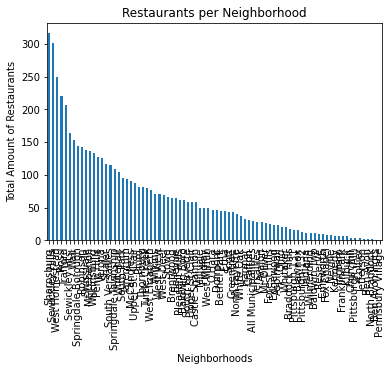

In [20]:
active.sort_values(ascending = False).plot.bar(title = "Restaurants per Neighborhood", xlabel = 'Neighborhoods', ylabel = 'Total Amount of Restaurants')

#hard to read the neighborhoods

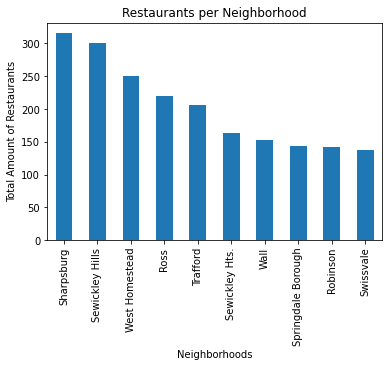

In [21]:
active.sort_values(ascending = False)[:10].plot.bar(title = "Restaurants per Neighborhood", xlabel = 'Neighborhoods', ylabel = 'Total Amount of Restaurants')

#sorting them in descending value and then creating a bar chart with only the top 10 

The graph shows that **Sharpsburg** has the most amount of restaurants followed by **Sewickley Hills** and then **West Homestead**